In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [2]:
# Taken from sklearn docs 
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [3]:
trainSet = pd.read_csv('dota2Train.csv')
testSet = pd.read_csv('dota2Test.csv')

x = trainSet.drop('-1', 1)
y = trainSet['-1']
testX = testSet.drop('-1', 1)
testY = testSet['-1']

trainSet.head()

# pd.get_dummies(trainSet)

,-1,223,2,2.1,0,0.1,0.2,0.3,0.4,0.5,...,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.100,0.101,0.102
0,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
1,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,154,2,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
3,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
4,1,122,2,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,-1


In [4]:
dt = DecisionTreeClassifier()

# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

# plot_learning_curve(dt, "Decision Tree", x, y, ylim=(0.0, 1.01), cv=cv, n_jobs=4)

In [9]:
dt.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
dtPred = dt.predict(testX)
print metrics.classification_report(testY, dtPred)

             precision    recall  f1-score   support

         -1       0.49      0.50      0.50      4791
          1       0.55      0.54      0.55      5502

avg / total       0.52      0.52      0.52     10293



<module 'matplotlib.pyplot' from '/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


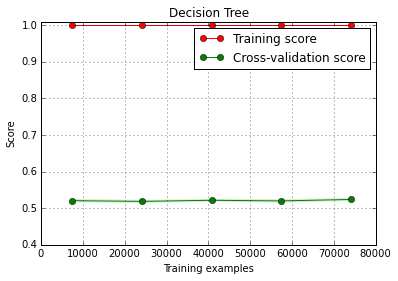

In [13]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier()
plot_learning_curve(dt, "Decision Tree", x, y, (0.4, 1.01), cv=cv, n_jobs=4)

In [123]:
mlp = MLPClassifier()
mlp.fit(x, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

<module 'matplotlib.pyplot' from '/Users/kristiansuhartono/python-env/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

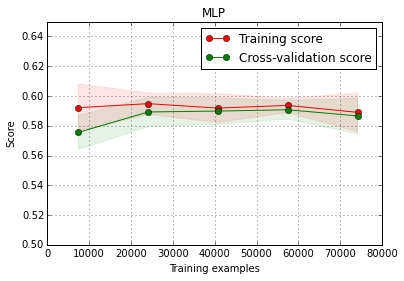

In [16]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
mlp = MLPClassifier()
plot_learning_curve(mlp, "MLP", x, y, (0.5, 0.65), cv=cv, n_jobs=4)

In [124]:
mlpPred = mlp.predict(testX)
print metrics.classification_report(testY, mlpPred)

             precision    recall  f1-score   support

         -1       0.59      0.41      0.49      4791
          1       0.60      0.76      0.67      5502

avg / total       0.60      0.60      0.58     10293



In [120]:
ada = AdaBoostClassifier()
ada.fit(x, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [122]:
adaPred = ada.predict(testX)
print metrics.classification_report(testY, adaPred)

             precision    recall  f1-score   support

         -1       0.56      0.49      0.52      4791
          1       0.60      0.67      0.63      5502

avg / total       0.58      0.59      0.58     10293



In [127]:
svc = SVC()
svc.fit(x,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [128]:
svcPred = svc.predict(testX)
print metrics.classification_report(testY, svcPred)

             precision    recall  f1-score   support

         -1       0.57      0.50      0.54      4791
          1       0.61      0.67      0.64      5502

avg / total       0.59      0.59      0.59     10293



In [131]:
knn = KNeighborsClassifier()
knn.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [132]:
knnPred = knn.predict(testX)
print metrics.classification_report(testY, knnPred)

             precision    recall  f1-score   support

         -1       0.49      0.48      0.49      4791
          1       0.56      0.57      0.56      5502

avg / total       0.53      0.53      0.53     10293

